# Proyecto 1 - Análitica de Textos 

Camilo Andrés Castilla 202122138 <br>
Sara Martinez 202221055

## Parte 2: Preparación y Entendimiento de Datos

### Introducción al Dataset y Carga de los Datos

In [45]:
# Importamos pandas para manejar el dataset
import pandas as pd

df = pd.read_excel('Datos_proyecto.xlsx')

# Primeras filas de los datos para entender mejor su estructura
print("Primeras 5 filas del dataset:")
pd.set_option("display.max_colwidth", None)  # muestra todo el texto sin cortar
display(df.head())



Primeras 5 filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.",4
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).",4
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.",3
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.",4
4,"Este grupo se centró en las personas que padecen trastornos mentales con comorbilidad de abuso de sustancias (mientras que la demencia, la discapacidad intelectual y el abuso de sustancias por sà solos quedaron excluidos del ámbito de análisis). Con 90 millones de euros de financiación, la comisión dispuso de tres años para ""iniciar y apoyar el desarrollo de proyectos a todos los niveles (tratamiento médico, mejora de los servicios, proyectos de vivienda, mejoras legislativas y organizativas) y proponer las medidas necesarias para elevar de forma permanente el nivel de los servicios de salud mental"".",3


In [46]:
# Obtención de información general sobre las columnas y tipos de datos
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


### Análisis descriptivo de la columna <span style="color:blue;"><em>textos</em></span>
En esta sección nos centraremos en analizar el campo "textos" del dataset.

Este campo contiene las opiniones de los ciudadanos escritas en lenguaje natural. Cada fila corresponde a un comentario o opinión que refleja la percepción de una persona sobre algún tema relacionado con los Objetivos de Desarrollo Sostenible (ODS).
Nuestro objetivo es entender la calidad, cantidad y características textuales de esta información para preparar análisis posteriores.

In [47]:
# Verificamos nulos y vacíos en la columna Description
num_nulls = df['textos'].isnull().sum()
num_empty = (df['textos'].str.strip() == '').sum()

print(f"Número de valores nulos en 'labels': {num_nulls}")
print(f"Número de valores vacíos en 'labels': {num_empty}")

Número de valores nulos en 'labels': 0
Número de valores vacíos en 'labels': 0


In [54]:
# Calculamos longitud de cada texto
df['text_length'] = df['textos'].str.len()

In [55]:
# Estadísticas básicas sobre la longitud
text_lenght_stats = df['text_length'].describe()
print("\nEstadísticas básicas de longitud de los textos:")
print(text_lenght_stats)


Estadísticas básicas de longitud de los textos:
count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: text_length, dtype: float64


In [56]:
# Visualización de algunas muestras representativas
print("\nEjemplos de textos:")
display(df[['textos', 'labels']].sample(5, random_state=42))


Ejemplos de textos:


,textos,labels
1490,"Por lo general, se entiende que los trastornos de leves a moderados no requieren tratamientos altamente especializados administrados por psiquiatras o en entornos hospitalarios en la gran mayoría de los casos. En cambio, en la mayoría de los países de la OCDE, los médicos de atención primaria asumen un papel de liderazgo en el tratamiento de trastornos leves a moderados (ver Tabla 4.2). Cuando la provisión a nivel de atención primaria para los trastornos leves a moderados está respaldada por una buena capacitación (tanto durante la capacitación médica como como parte de la educación médica continua), por el apoyo de profesionales especialistas en atención de la salud mental y redes de apoyo, y por buenas opciones de derivación si un paciente necesita acceder a un nivel de atención más especializado, puede ser una forma muy eficaz de brindar atención a un gran número de pacientes.",3
387,"En la mayoría de los contratos, el objetivo es llegar a cuatro o cinco pacientes por hora, cumpliendo también con los estándares de calidad especificados. En la encuesta nacional de salud de 2006, por ejemplo, el 31% de la población reportó obtener servicios de salud del sector privado al menos una vez al año, independientemente de su cobertura bajo la CCSS. En 2009, el 60% de los encuestados afirmó que prefería proveedores privados de atención médica (Gutiérrez, 2009).",3
1419,"Las tasas de consumo de alcohol y tabaquismo no han disminuido y se encuentran entre las más altas de la UE. Las tasas de obesidad, aunque siguen siendo más bajas que en muchos otros países de la UE, están aumentando tanto en adultos como en adolescentes. Alentadoramente, las tasas de tabaquismo entre los adolescentes disminuyeron en los últimos años y Austria finalmente se está poniendo al día con otros países de la UE en términos de políticas para la protección de los no fumadores, por ejemplo, mediante la introducción de una prohibición total de fumar en restaurantes y bares. Se pusieron en marcha Planes Nacionales de Acción sobre Nutrición y Actividad Física para contrarrestar el aumento de la obesidad.",3
410,"Hubo una disminución constante en el porcentaje de estudiantes que afirmaron un alto nivel de satisfacción con la vida, con proporciones más bajas para las niñas en comparación con los niños para cada año de administración de la encuesta (con la excepción de 2006). Una tendencia notable que surgió del análisis de los datos fue la asociación entre un fuerte apoyo social, particularmente el apoyo familiar, y una alta satisfacción con la vida. Este hallazgo subraya el papel fundamental que desempeñan las relaciones positivas y las redes sociales sólidas para contribuir y mejorar el bienestar psicológico de los estudiantes. (Morrison y Peterson, 2016, págs.",4
482,"La oferta insuficiente de programas vocacionales de alta calidad y lugares de estudio de educación terciaria obstaculiza la formación y el crecimiento del capital humano. Estabilizar y simplificar la educación vocacional al enfocarse más en aprendizajes de alta calidad apoyaría la participación. El gobierno necesita encontrar medidas eficientes para aumentar la participación, especialmente entre los niños de familias de bajos ingresos, para reemplazar el subsidio de mantenimiento educativo abolido. Reformas adicionales a la financiación de la educación superior podrían reducir los costos de los contribuyentes y ayudar a financiar una expansión necesaria en el sector. The Implications of School Fundingâ€, CfBT Education Trust Research Paper. Medición de la variación en la efectividad de los maestros en Inglaterra"", documento de trabajo 09/212 del Centro para el Mercado y la Organización Pública, Universidad de Bristol.",4


In [57]:
#Verificamos ahora si la columna labels tiene algun valor vacio
df['labels'].isnull().any()


False

<Figure size 1000x600 with 0 Axes>

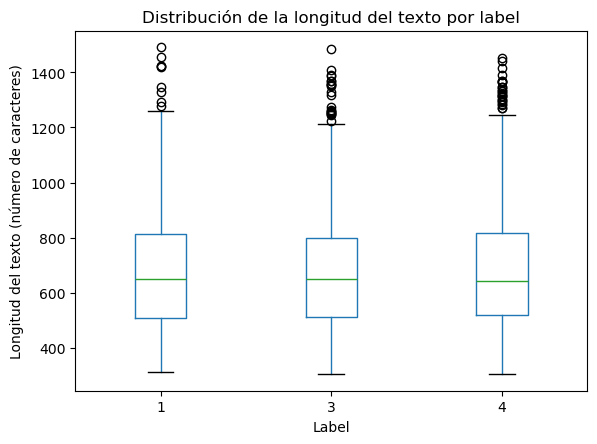

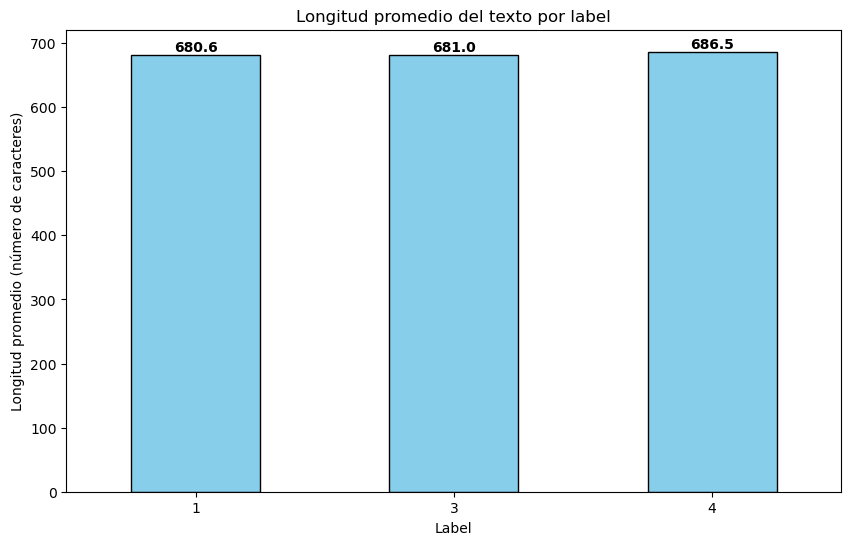

In [58]:
import matplotlib.pyplot as plt

#Como no hay ningun valor vacio podemos continuar
#Ahora, parece interesante ver un grafico que muestre la longitud de las palabras dependiendo de su label a ver si
#pudiera existir alguna relación entre su longitud y la clasificación que tiene 

# Agrupamos para calcular las estadisticas por label 
grouped = df.groupby('labels')['text_length'].agg(['mean', 'min', 'max']).dropna()


#Primero queremos ver un boxplot para cada label 
plt.figure(figsize=(10,6))
df.boxplot(column='text_length', by='labels', grid=False)
plt.title('Distribución de la longitud del texto por label')
plt.suptitle('')  # quita el título automático de pandas
plt.xlabel('Label')
plt.ylabel('Longitud del texto (número de caracteres)')
plt.show()

#Ahora queremos ver simplemente el promedio
grouped = df.groupby('labels')['text_length'].mean()

grouped = df.groupby('labels')['text_length'].mean()

plt.figure(figsize=(10,6))
bars = grouped.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Longitud promedio del texto por label')
plt.xlabel('Label')
plt.ylabel('Longitud promedio (número de caracteres)')
plt.xticks(rotation=0)

# Agregar los valores encima de cada barra
for i, valor in enumerate(grouped):
    plt.text(i, valor + 1, f"{valor:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()



Con base en los boxplots, es posible ver que para cada label hay cierto número de outliers. Esto indica que para cada label, hay textos con un número de caracteres muy alto, lo cual no necesariamente indica un error sino que los textos muy largos son poco frecuentes. De igual forma, el boxplot indica que los textos de cada label son altamente homogeneos, teniendo en cuenta que tienen una media y distribución similar. 

### Procesamiento de texto: tokenización y limpieza de palabras

Vamos a procesar el texto de los datos para hacer un análisis basado en las palabras. Usaremos el campo "textos" y transformaremos cada texto en una lista de palabras limpias y significativas. Este paso lo vamos a usar para realizar un análisis posterior de frecuencia y relevancia de palabras. 

In [77]:
import nltk
import string
from nltk.corpus import stopwords

# Descargar stopwords si no están ya descargadas
nltk.download('stopwords')

# Definir las stopwords en español (todos los textos estan en español)
stop_words = set(stopwords.words('spanish'))

# Función para limpiar y tokenizar texto
def clean_tokenize(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar la función a la columna Description
df['tokens'] = df['textos'].apply(clean_tokenize)

print("Ejemplos de tokens en los primeros textos:")
display(df[['textos', 'tokens']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camilo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ejemplos de tokens en los primeros textos:


,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.","[aprendizaje, educación, consideran, sinónimos, escolarización, formal, organizaciones, auxiliares, editoriales, educación, juntas, examinadoras, organizaciones, formación, docentes, consideran, extensiones, acuerdos, establecidos, gobiernos, marco, comprensión, vuelto, cada, vez, inadecuado]"
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).","[niños, pequeños, bebés, niños, pequeños, capacitación, especializada, práctica, parece, fuertemente, asociada, calidad, pedagógica, resultados, cognitivos, sociales, educadores, primera, infancia, encuentran, entornos, sociales, cada, vez, complejos, encuentran, multiplicidad, antecedentes, experiencias, familiares, factores, crean, imperativos, adoptar, nuevas, pedagogías, prácticas, organizacionales, acomodar, pluralismo, elliott, 2006]"
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.","[además, formación, especialistas, medicina, general, incluye, tareas, requieren, conocimiento, profundo, problemas, comunes, salud, pública, incluida, salud, mental, cuestionario, salud, mental, ocde, 2013, dado, control, atención, primaria, limitar, acceso, servicios, salud, mental, especializados, pacientes, necesitan, tratamiento, trastornos, mentales, graves, particular, pueden, buscar, atención, nivel, especializado, directamente, servicios, especialistas, psiquiatría, brindan, principalmente, salas, ambulatorias, psiquiatría, ubicadas, hospitales, generales]"
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.","[países, ocde, tiende, pasar, cursos, obligatorios, optativos, abiertos, estudiantes, distintas, facultades, escuelas, planteamiento, facilita, formación, equipos, estudiantes, distintas, formaciones, intereses, trabajo, equipos, interdisciplinares, permite, individuos, concentrarse, mejor, saben, gusta, mismo, tiempo, familiarizarse, nuevos, conocimientos, pueden, asociarse, nueva, forma, resolver, problema, crear, nuev

### Análisis exploratorio de palabras más frecuentes y representativas

En esta sección exploraremos las palabras extraídas en la tokenización y limpieza de la descripción. Nuestro objetivo es identificar las palabras que aparecen con mayor frecuencia y que mejor describen el conjunto de películas y series.

Las 20 palabras más frecuentes en las descripciones:


,Word,Frequency
0,salud,1107
1,pobreza,1019
2,educación,992
3,países,962
4,atención,900
5,estudiantes,741
6,ocde,587
7,escuelas,586
8,años,559
9,servicios,548


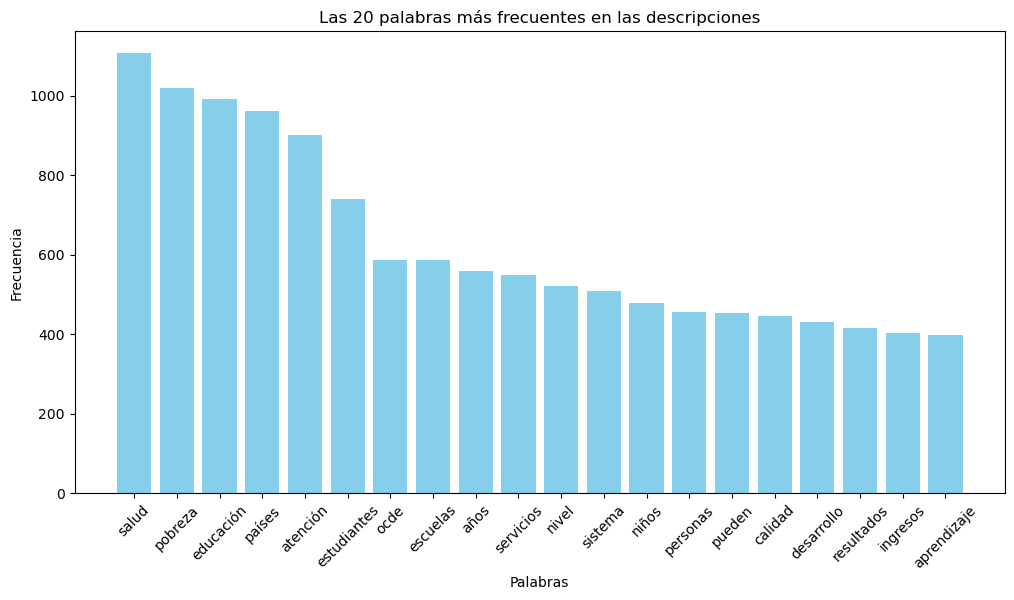

In [78]:
from collections import Counter
import matplotlib.pyplot as plt

# Aplanar la lista de tokens
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]

# Contar frecuencia de palabras
word_counts = Counter(all_tokens)

# Obtener las 20 palabras más comunes
most_common_words = word_counts.most_common(20)

# Crear dataframe para visualización
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

print("Las 20 palabras más frecuentes en las descripciones:")
display(freq_df)

# Graficar las palabras más frecuentes
plt.figure(figsize=(12,6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Las 20 palabras más frecuentes en las descripciones')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

Los resultados muestran que las palabras más frecuentes correspoden a salud, pobreza y educación, lo cual hace sentido porque son consistentes con el contexto del proyecto. Esto se debe a que el ODS 1 corresponde a "Fin de la pobreza", el 3 a "Salud y Bienestar" y el 4 a "Educación de calidad". Adicionalmente, se puede decir que como "salud" es la más frecuente, es posible que sea un indicador de que las personas tienen mas opiciones acerca del bienestar o servicios médicos que sobre pobreza o educación, aunque las tres reflejan un balance. 

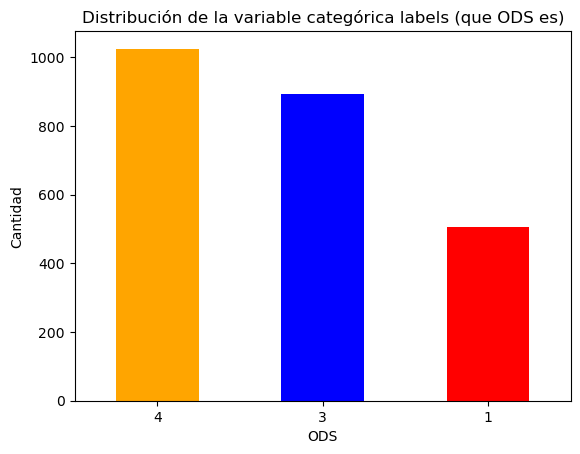

In [79]:
#Graficar distribución. Tambien queremos ver que tantos registros hay por cada label (ODS)
df['labels'].value_counts().plot(kind='bar', color=['orange', 'blue', 'red'])
plt.title('Distribución de la variable categórica labels (que ODS es)')
plt.xlabel('ODS')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

### Creación de un DataFrame con TF-IDF de palabras representativas y variable objetivo

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Las 20 palabras más frecuentes ya están en 'most_common_words'
top_20_words = [word for word, _ in most_common_words]

# Definir vectorizador TF-IDF con vocabulario limitado
vectorizer = TfidfVectorizer(vocabulary=top_20_words)

# Aplicar tf-idf sobre la columna original Description
tfidf_matrix = vectorizer.fit_transform(df['textos'].fillna(''))

# Convertir matriz tf-idf en DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=top_20_words)

# Construir DataFrame final con columnas indicadas
final_df = pd.concat([df[['textos', 'labels']], tfidf_df], axis=1)

print("Primeras filas del DataFrame final con TF-IDF y variable objetivo:")
display(final_df.head())

Primeras filas del DataFrame final con TF-IDF y variable objetivo:


,textos,labels,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,...,nivel,sistema,niños,personas,pueden,calidad,desarrollo,resultados,ingresos,aprendizaje
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.",4,0.000000,0.0,0.841575,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.540141
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).",4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.824416,0.000000,0.000000,0.401669,0.000000,0.398748,0.0,0.000000
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.",3,0.735042,0.0,0.000000,0.000000,0.389156,0.000000,0.206718,0.000000,...,0.203759,0.0,0.000000,0.000000,0.207859,0.000000,0.000000,0.000000,0.0,0.000000
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.",4,0.000000,0.0,0.000000,0.234758,0.000000,0.832674,0.282588,0.301573,...,0.000000,0.0,0.000000,0.000000,0.284148,0.000000,0.000000,0.000000,0.0,0.000000
4,"Este grupo se centró en las personas que padecen trastornos mentales con comorbilidad de abuso de sustancias (mientras que la demencia, la discapacidad intelectual y el abuso de sustancias por sà solos quedaron excluidos del ámbito de análisis). Con 90 millones de euros de financiación, la comisión dispuso de tres años para ""iniciar y apoyar el desarrollo de proyectos a todos los niveles (tratamiento médico, mejora de los servicios, proyectos de vivienda, mejoras legislativas y organizativas) y proponer las medidas necesarias para elevar de forma permanente el nivel de los servicios de salud mental"".",3,0.292323,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.324136,0.0,0.000000,0.349133,0.000000,0.000000,0.343207,0.000000,0.0,0.000000


In [82]:
final_df.to_csv('procesamientoTextosODS.csv', index=False, sep=';')

## Parte 3: Modelado y Evaluacion

In [83]:
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
import sklearn as sklearn

In [84]:
print('The scikit-learn version is {}.'.format(sklearn.__version__)) 

The scikit-learn version is 1.3.0.


In [90]:

df_procesado = pd.read_csv(
    "procesamientoTextosODS.csv",
    sep=";",              # separador correcto
    quotechar='"',        # reconoce comillas en los textos
    encoding="utf-8-sig"  # evita problemas de caracteres especiales
)

# Mostramos las primeras filas para conocer la estructura de los datos
print("Primera filas del dataset:")
display(df_procesado.head())

Primera filas del dataset:


,textos,labels,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,...,nivel,sistema,niños,personas,pueden,calidad,desarrollo,resultados,ingresos,aprendizaje
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.",4,0.000000,0.0,0.841575,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.540141
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).",4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.824416,0.000000,0.000000,0.401669,0.000000,0.398748,0.0,0.000000
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.",3,0.735042,0.0,0.000000,0.000000,0.389156,0.000000,0.206718,0.000000,...,0.203759,0.0,0.000000,0.000000,0.207859,0.000000,0.000000,0.000000,0.0,0.000000
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.",4,0.000000,0.0,0.000000,0.234758,0.000000,0.832674,0.282588,0.301573,...,0.000000,0.0,0.000000,0.000000,0.284148,0.000000,0.000000,0.000000,0.0,0.000000
4,"Este grupo se centró en las personas que padecen trastornos mentales con comorbilidad de abuso de sustancias (mientras que la demencia, la discapacidad intelectual y el abuso de sustancias por sà solos quedaron excluidos del ámbito de análisis). Con 90 millones de euros de financiación, la comisión dispuso de tres años para ""iniciar y apoyar el desarrollo de proyectos a todos los niveles (tratamiento médico, mejora de los servicios, proyectos de vivienda, mejoras legislativas y organizativas) y proponer las medidas necesarias para elevar de forma permanente el nivel de los servicios de salud mental"".",3,0.292323,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.324136,0.0,0.000000,0.349133,0.000000,0.000000,0.343207,0.000000,0.0,0.000000


### Construccion del modelo 

In [96]:
#Separar la variable de entrada a la variable objetivo
Y=df_procesado["labels"]
#Del conjunto de datos se elimina la variable labels
X=df_procesado.drop(["labels"],axis=1)
X=df_procesado.drop(["textos"],axis=1)

Dividr en train y en test

In [97]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [98]:
# Creación del objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [100]:
# Entrenamiento del modelo de arbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train,Y_train)


In [101]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [102]:
 # Se genera la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

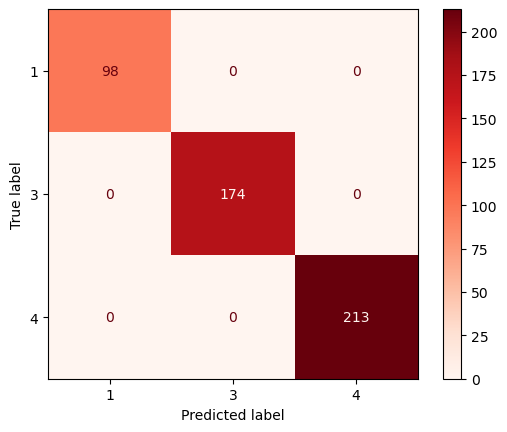

In [103]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Reds)

plt.show()

In [105]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
#print("Recall: {}".format(recall_score(Y_test,y_pred)))
#print("Precisión: {}".format(precision_score(Y_test,y_pred)))
#print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 1.00
